> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Using this cell to set up import statements for all of the packages that are considered to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

"""Changing scientific numbers to numeric numbers"""
#https://stackoverflow.com/questions/38689125/how-to-get-rid-of-pandas-converting-large-numbers-in-excel-sheet-to-exponential
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.5MB/s eta 0:00:01  6% |██                              | 645kB 13.0MB/s eta 0:00:01    17% |█████▌                          | 1.8MB 11.9MB/s eta 0:00:01    22% |███████▏                        | 2.3MB 10.2MB/s eta 0:00:01    40% |████████████▉                   | 4.2MB 16.9MB/s eta 0:00:01    63% |████████████████████▌           | 6.7MB 15.1MB/s eta 0:00:01    74% |████████████████████████        | 7.8MB 13.4MB/s eta 0:00:01    80% |█████████████████████████▉      | 8.4MB 15.2MB/s eta 0:00:01    91% |█████████████████████████████▍  | 9.6MB 14.4MB/s eta 0:00:01    97% |███████████████████████████████▏| 10.2MB 13.5MB/s eta 0:00:01
    99% |████████████████████████████████| 13.4MB 12.7MB/s eta 0:00:01   10% |███▍                            | 1.4MB 12.6MB/s eta 0:00:01    28% |█████████▎                      | 3.9MB 12.8MB/s eta 0:00:01    33% |██████████▊                     | 4.5MB 13.1MB/s eta 0:00:01    37% |████████████             

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#looking for duplicate data
sum(df.duplicated())

1

In [6]:
#looking for duplicate data
df.drop_duplicates(inplace=True)

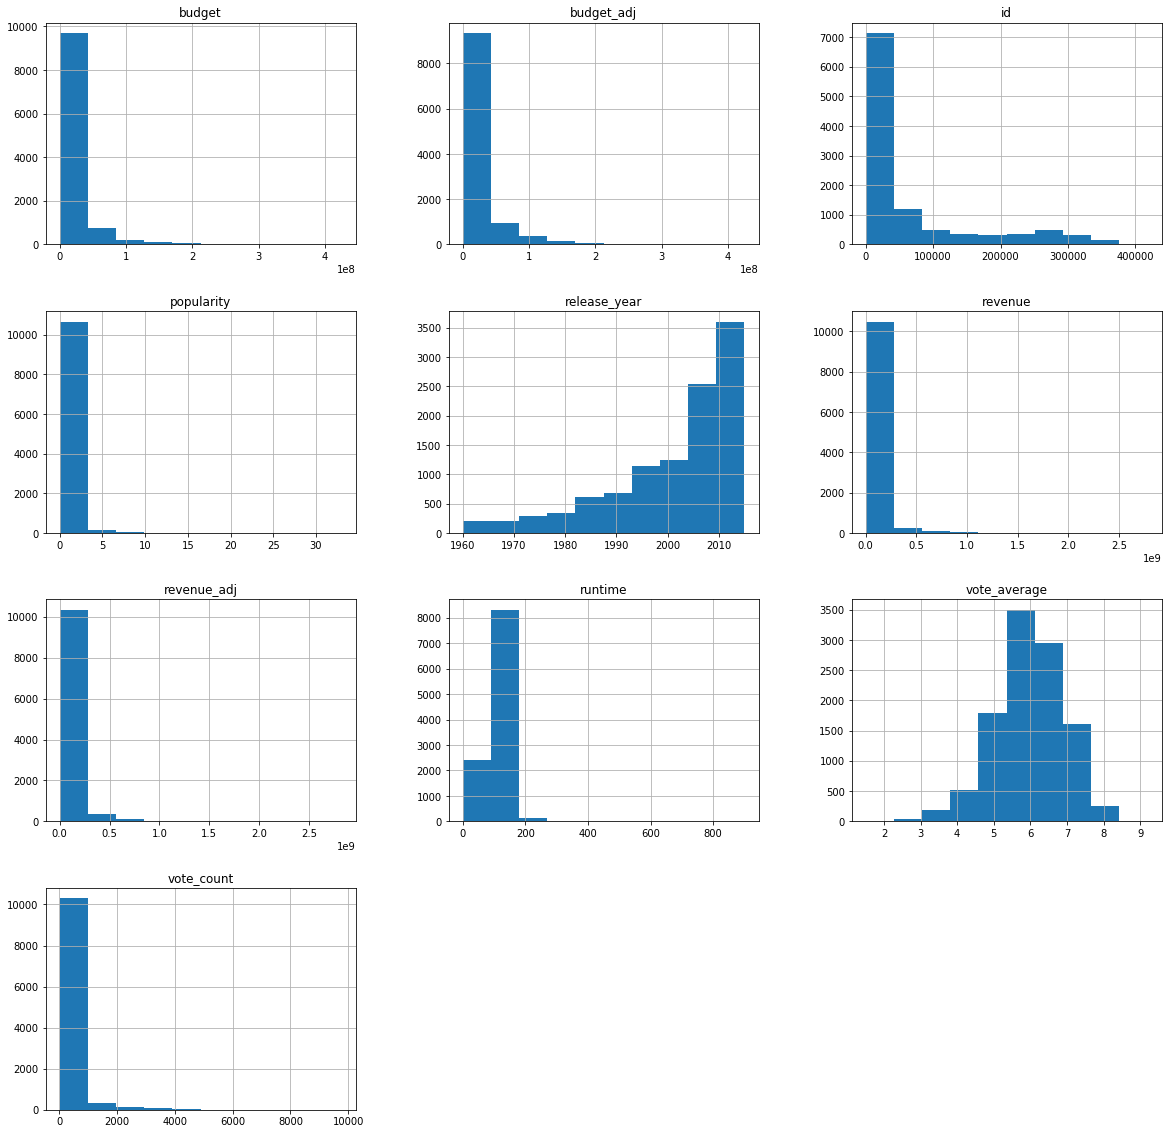

In [7]:
#looking at the graph for all columns
df.hist(figsize=(20,20));

In [8]:
#convert release_year to datetime
df['release_year']=pd.to_datetime(df['release_year'])

In [9]:
#looking if there is a zero values
df['budget_adj'].describe()

count       10865.00
mean     17549894.04
std      34307526.66
min             0.00
25%             0.00
50%             0.00
75%      20853251.08
max     425000000.00
Name: budget_adj, dtype: float64

In [10]:
#looking if there is a zero values
df['revenue_adj'].describe()

count        10865.00
mean      51369001.76
std      144638333.13
min              0.00
25%              0.00
50%              0.00
75%       33701729.01
max     2827123750.41
Name: revenue_adj, dtype: float64

In [11]:
#Thing we want to see in visual
#some questions we want to know the answer
#answering them are the aim of all data cleaning and visual

In [12]:
#we want to see overview of genres and which is the higest percentage
#Does the budget increase over years ?
#Does increasing budget let to increase the popularity ?
#does the popularity increase over the years and is it a good business ?


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [13]:
#remove the unwanted columns that don't important to our analysis
#then make all the nan vlaue in the genres to Action to split them
df.drop(["overview","keywords","tagline","homepage","original_title",'release_date','imdb_id','director','budget','revenue'],axis=1,inplace=True)
df['genres'].fillna('Action',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
cast                    10789 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null datetime64[ns]
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 1018.6+ KB


In [14]:
#remove all the zero values in both with the mean
#then we drop all nan value
df['budget_adj']=df['budget_adj'].replace(0,df['budget_adj'].mean())
df['revenue_adj']=df['revenue_adj'].replace(0,df['revenue_adj'].mean())
df.dropna(inplace = True)
df.isnull().sum()
df.shape

(9799, 11)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 10865
Data columns (total 11 columns):
id                      9799 non-null int64
popularity              9799 non-null float64
cast                    9799 non-null object
runtime                 9799 non-null int64
genres                  9799 non-null object
production_companies    9799 non-null object
vote_count              9799 non-null int64
vote_average            9799 non-null float64
release_year            9799 non-null datetime64[ns]
budget_adj              9799 non-null float64
revenue_adj             9799 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 918.7+ KB


In [16]:
#dropping the nan value 
df.dropna(inplace = True)
df.isnull().sum()
df.shape

(9799, 11)

In [17]:
#split the column genres 
df['genres'] = df['genres'].str.split('|')
df.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

       id  popularity                                               cast  \
0  135397       32.99  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1   76341       28.42  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  262500       13.11  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  140607       11.17  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  168259        9.34  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

   runtime                                          genres  \
0      124  [Action, Adventure, Science Fiction, Thriller]   
1      120  [Action, Adventure, Science Fiction, Thriller]   
2      119          [Adventure, Science Fiction, Thriller]   
3      136   [Action, Adventure, Science Fiction, Fantasy]   
4      137                       [Action, Crime, Thriller]   

                                production_companies  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...        5562   
1  Village Roadshow Pictures|Kenne

In [18]:
#making a new dataframe just for genres
df_gen = df.genres.apply(pd.Series)
df_gen.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

           0                1                2         3    4
0     Action        Adventure  Science Fiction  Thriller  NaN
1     Action        Adventure  Science Fiction  Thriller  NaN
2  Adventure  Science Fiction         Thriller       NaN  NaN
3     Action        Adventure  Science Fiction   Fantasy  NaN
4     Action            Crime         Thriller       NaN  NaN

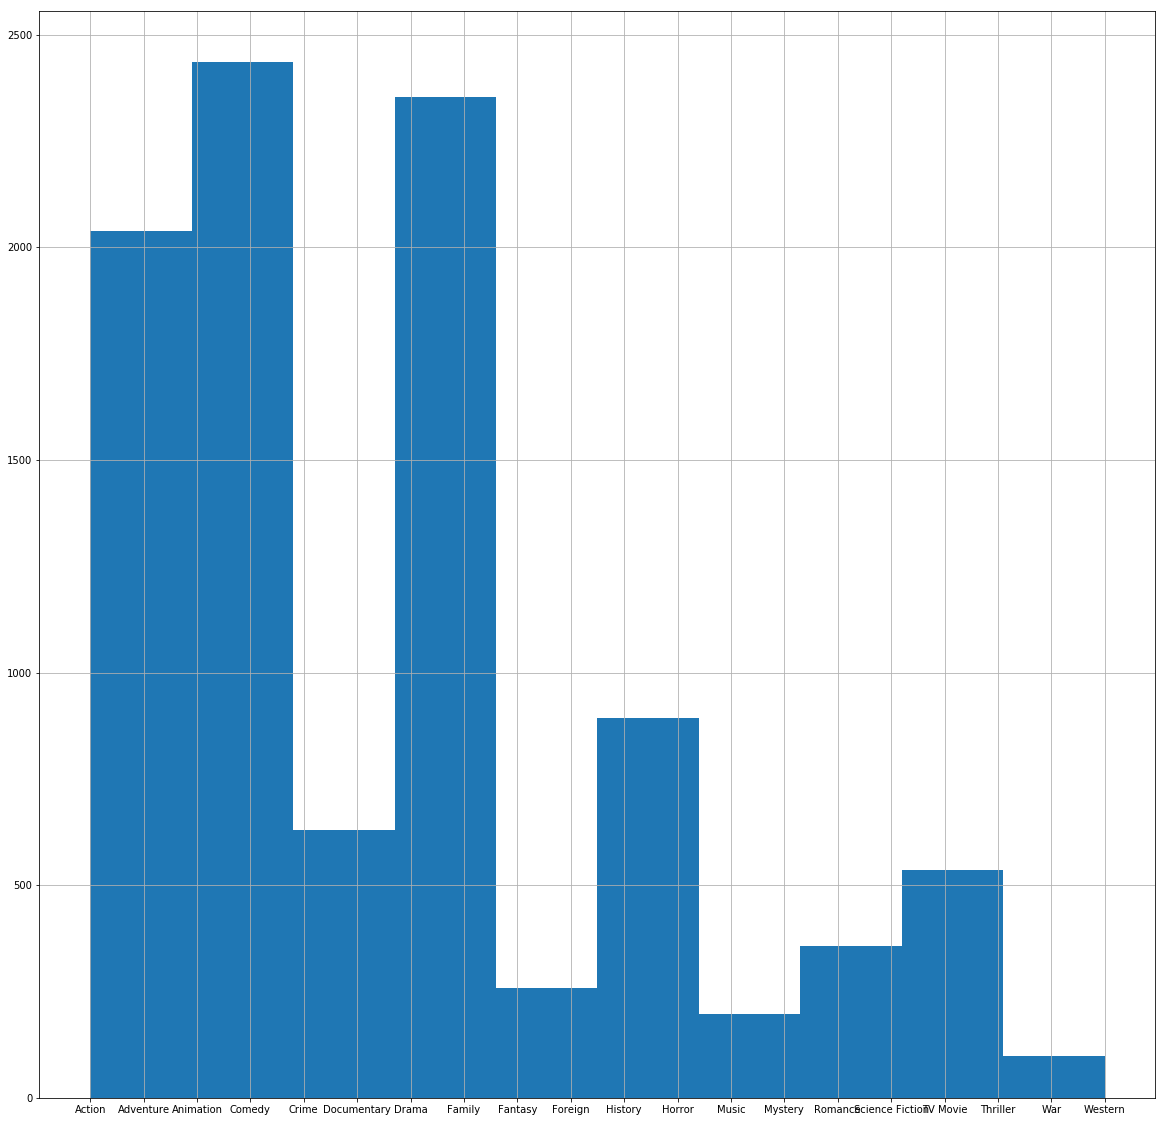

In [19]:
#looking at the new dataframe
df_gen[0].hist(figsize=(20,20))

In [20]:
#combine both dataframe 
df1=df.append(df_gen)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19598 entries, 0 to 10865
Data columns (total 16 columns):
id                      9799 non-null float64
popularity              9799 non-null float64
cast                    9799 non-null object
runtime                 9799 non-null float64
genres                  9799 non-null object
production_companies    9799 non-null object
vote_count              9799 non-null float64
vote_average            9799 non-null float64
release_year            9799 non-null datetime64[ns]
budget_adj              9799 non-null float64
revenue_adj             9799 non-null float64
0                       9799 non-null object
1                       7824 non-null object
2                       4717 non-null object
3                       1851 non-null object
4                       507 non-null object
dtypes: datetime64[ns](1), float64(7), object(8)
memory usage: 2.5+ MB


/opt/conda/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return res


In [21]:
#drop the unwanted columns 
#since we remove the orginal budget and revenue so we can rename 
#both adj to the orgin name to make things easy
df1.drop(['genres',1,2,3,4],axis=1,inplace=True)
df1.rename(columns={0: "genres", "budget_adj": "budget",'revenue_adj':'revenue'},inplace=True)

In [22]:
#remove all the nan value with the mean 
df1['runtime'].fillna(df1['runtime'].mean(),inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Does the budget effect the runtimes ?)(Does the budget increased over the years?)


AttributeError: 'DataFrame' object has no attribute 'set_xlabel'

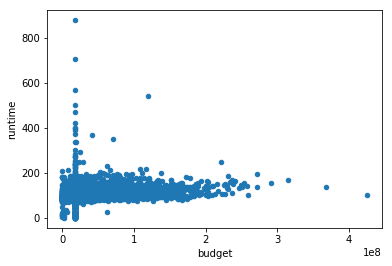

In [23]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df1.plot(x='budget',y='runtime',kind='scatter')
df1.set_xlabel('budget')
df1.set_ylabel('runtime')
df1.set_title('Looking at budget vs runtime')

In [ ]:
#we know that relation between budget and runtime isn't linear and the are high runtime with low budget 

In [ ]:
df1.plot(x='budget',y='release_year',kind='scatter')
df1.set_xlabel('budget')
df1.set_ylabel('release_year')
df1.set_title('looking at budget vs release year')

In [ ]:
#with years the budget increase after 1990

### Research Question 2  (what is the most common genres for all time ?)(Does the popularity increase over years ?)(Does increasing the budget lead to more popularity?)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df1.genres.value_counts().plot(kind='pie',figsize=(20,20))
df1.set_title('looking at the genres as a full review')

In [ ]:
#we know that the drama movies are the most genres

In [ ]:
df1.plot(x='runtime',y='vote_count',kind='scatter')
df1.set_xlabel('runtime')
df1.set_ylabel('vote_count')
df1.set_title('looking at runtimes vs vote count')

In [ ]:
#the graph make a normal distubition 

In [ ]:
df.plot(x='budget',y='popularity',kind='scatter')
df1.set_xlabel('budget')
df1.set_ylabel('popularity')
df1.set_title('Looking at budget vs popularity')

In [ ]:
#we know that at the mean of the budget gets the highest popularity

In [ ]:
df.plot(x='release_year',y='popularity',kind='scatter')
df1.set_xlabel('release_year')
df1.set_ylabel('popularity')
df1.set_title('Looking at release year vs popularity')

In [ ]:
#the popularity increase over the years and we know it is a good business 

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.
we know that relation between budget and runtime isn't linear and the are high runtime with low budget 
with years the budget increase after 1990
we know that the drama movies are the most genres
the graph make a normal distubition between runtimes vs vote count
we know that at the mean of the budget gets the highest popularity
the popularity increase over the years and we know it is a good business 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

### Limitations
> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 
More budget don't let to increase the outcome and runtime
the popularity increase over the ye

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])